In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
df  = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
### Check for the Null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

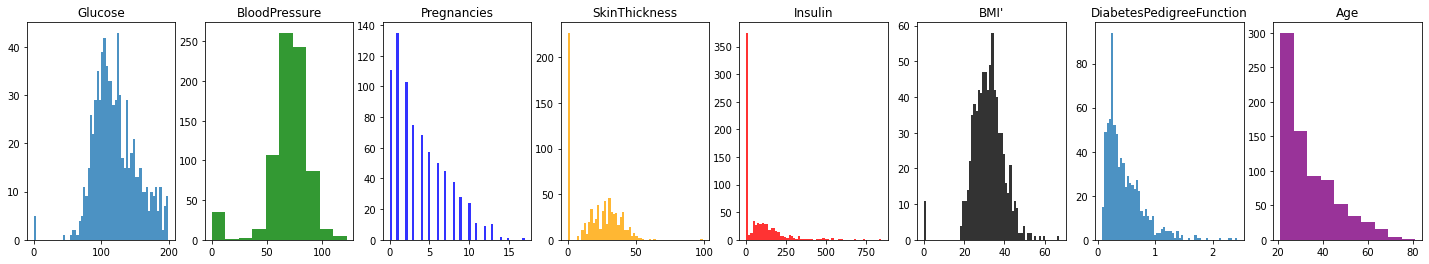

In [ ]:
### Featuer distribution
figure, axis = plt.subplots(1,8,figsize =(25,4))
axis0, axis1, axis2, axis3,axis4,axis5,axis6,axis7 = axis.flatten()

axis0.hist(df['Glucose'], bins = 60, alpha =0.8 )
axis1.hist(df['BloodPressure'], bins = 10, color="green" ,alpha =0.8 )
axis2.hist(df['Pregnancies'], bins = 60, color="blue",alpha =0.8 )
axis3.hist(df['SkinThickness'], bins = 60, color="orange",alpha =0.8 )
axis4.hist(df['Insulin'], bins = 60, color="red",alpha =0.8 )
axis5.hist(df['BMI'], bins = 60, color="black",alpha =0.8 )
axis6.hist(df['DiabetesPedigreeFunction'], bins = 60, alpha =0.8 )
axis7.hist(df['Age'], bins = 10, color="purple" ,alpha =0.8 )

axis0.set_title("Glucose")
axis1.set_title("BloodPressure")
axis2.set_title("Pregnancies")
axis3.set_title("SkinThickness")
axis4.set_title("Insulin")
axis5.set_title("BMI'")
axis6.set_title("DiabetesPedigreeFunction")
axis7.set_title("Age")


plt.show()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


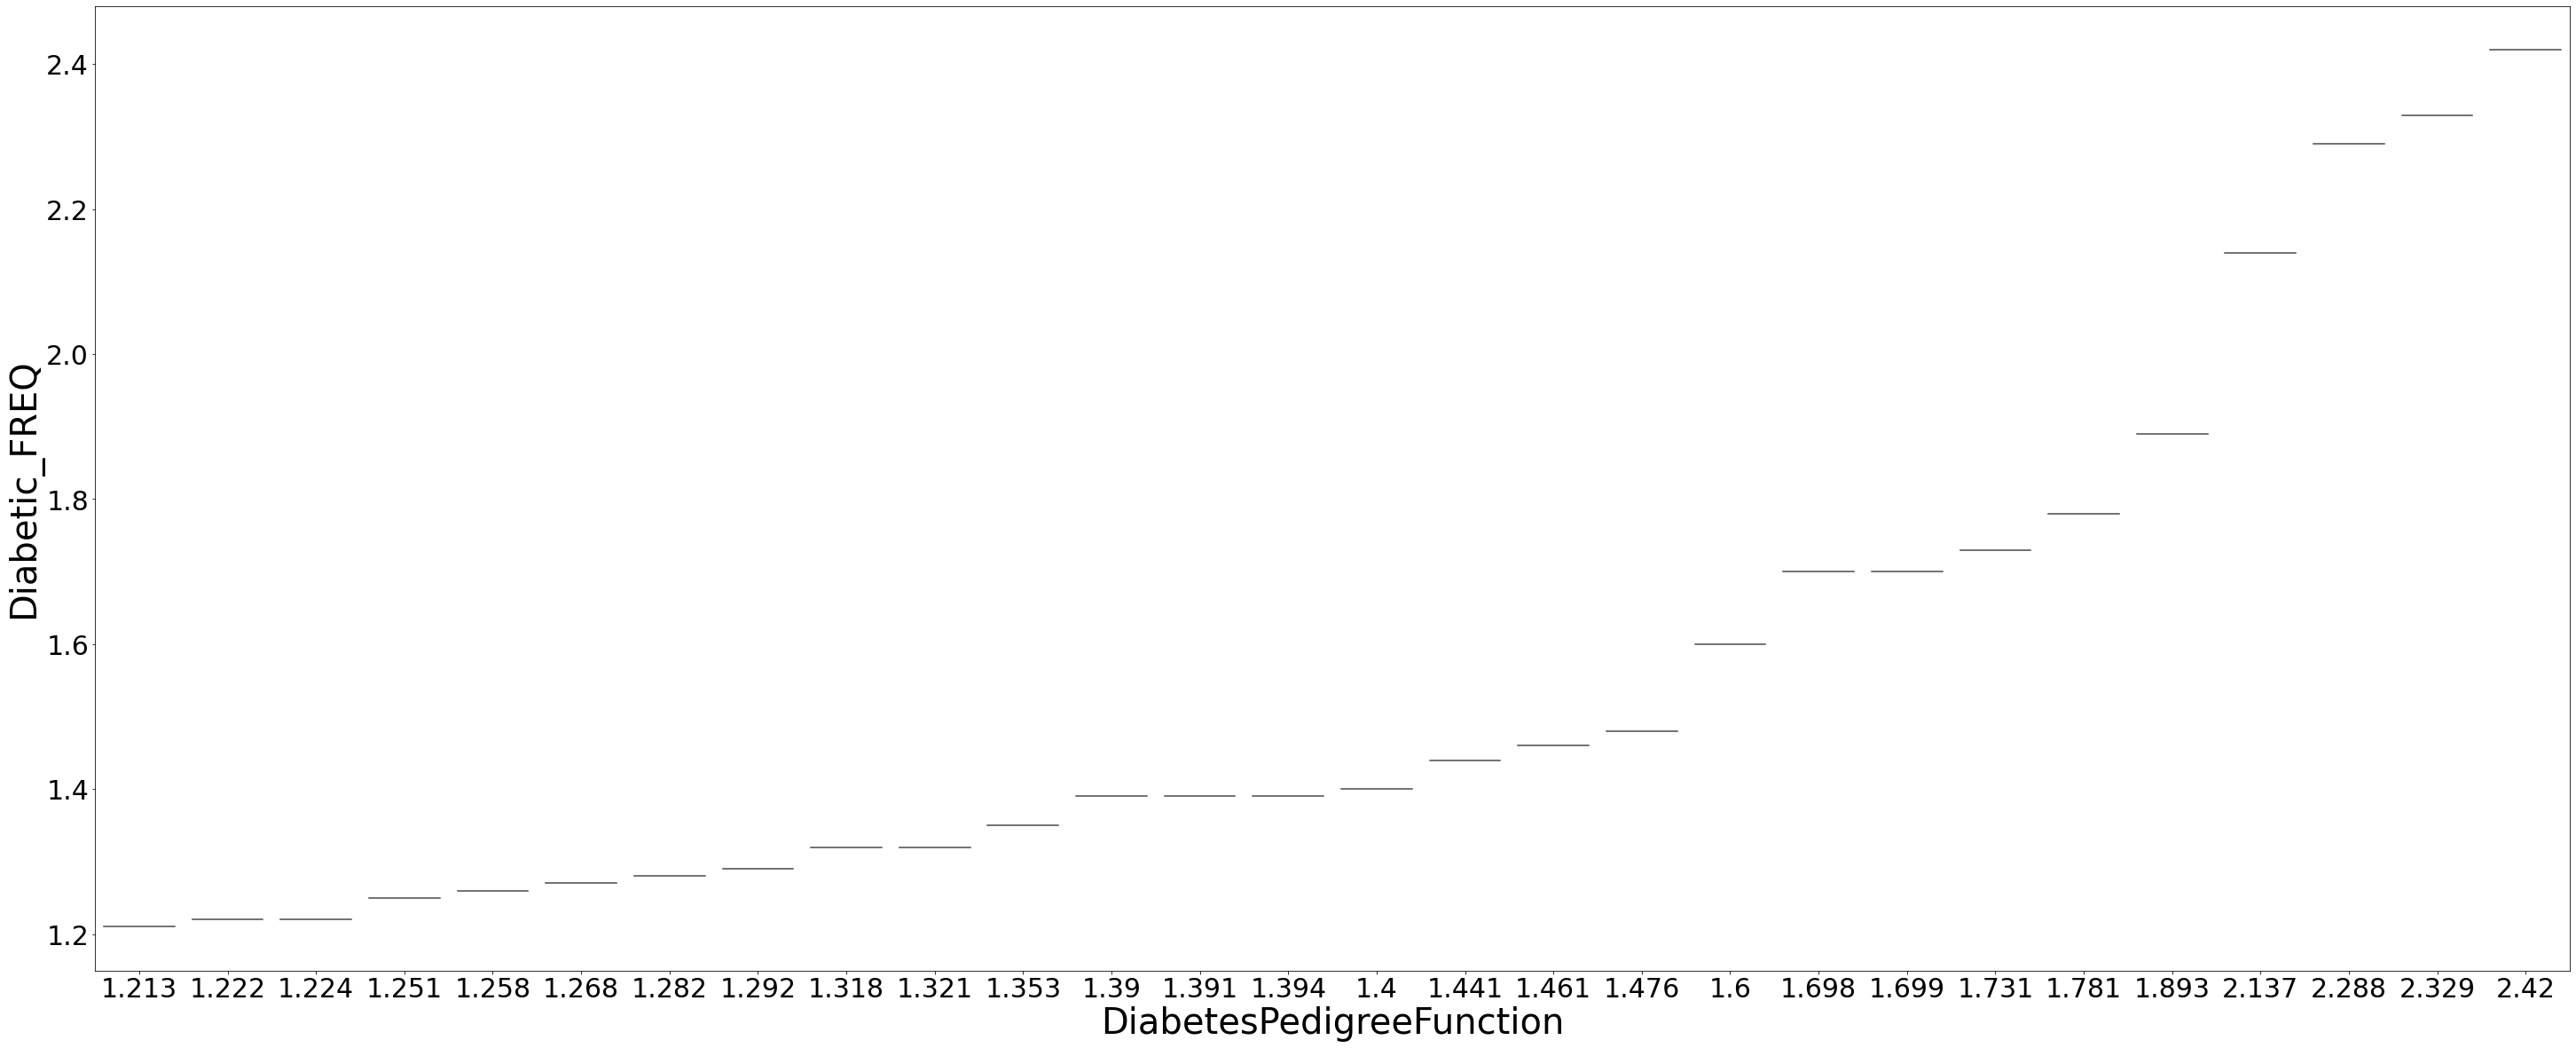

In [ ]:
### Getting an understanding about the outliers
figure = plt.figure(figsize = (50,20))
df_subset = df[(df['DiabetesPedigreeFunction']>=1.2)]
df_subset

df_subset['Diabetic_FREQ'] = round(df['DiabetesPedigreeFunction'],2)
sns.violinplot(y='Diabetic_FREQ',x='DiabetesPedigreeFunction',data=df_subset)
plt.xlabel('DiabetesPedigreeFunction',fontsize=40)
plt.ylabel('Diabetic_FREQ',fontsize=40)
plt.tick_params(labelsize=30)


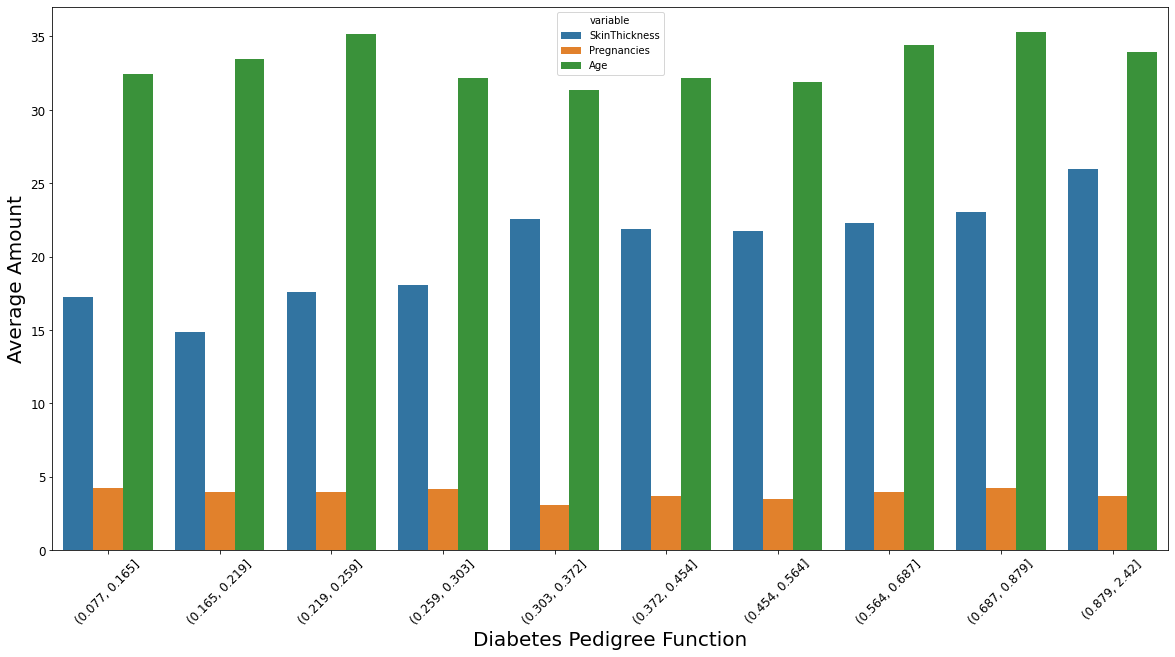

In [ ]:
### Getting an understanding about the data distribution
df['Diabetics_decile'] = pd.qcut(df['DiabetesPedigreeFunction'], q=10) #create 10 ranges of balance
df_bal_dec_grp   = df.groupby('Diabetics_decile', as_index=False).mean()
df_bal_dec_grp.shape
df_bal_dec_grp   = df_bal_dec_grp[['Diabetics_decile', 'SkinThickness', 'Pregnancies', 'Age']]
df_bal_dec_grp
df_bal_dec_grp_melted = pd.melt(df_bal_dec_grp, id_vars = 'Diabetics_decile')
df_bal_dec_grp_melted
figure = plt.figure(figsize=(20,10))
sns.barplot(x= "Diabetics_decile" , y = "value", hue = 'variable', data =df_bal_dec_grp_melted)
plt.ylabel("Average Amount", fontsize=20)
plt.xlabel("Diabetes Pedigree Function", fontsize =20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()



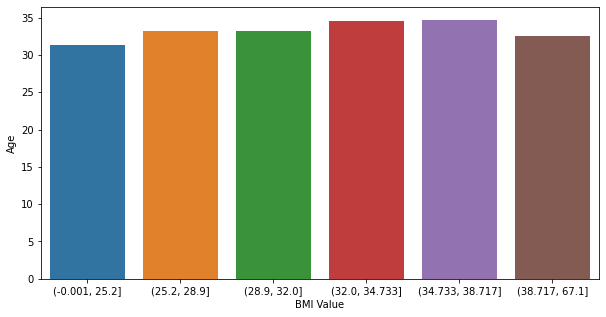

In [ ]:
### Getting an understanding about the data distribution
df['BMI Value'] = pd.qcut(df['BMI'], q=6)
df_pur_freq_grp = df.groupby('BMI Value', as_index=False).mean()
df_pur_freq_grp
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "BMI Value" , y = "Age", data =df_pur_freq_grp)
plt.show()


In [ ]:
#Build the Clusters
from sklearn.mixture import GaussianMixture
n_clusters = 4
X = df[['Age', 'BMI']].copy()

gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=4)

In [ ]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

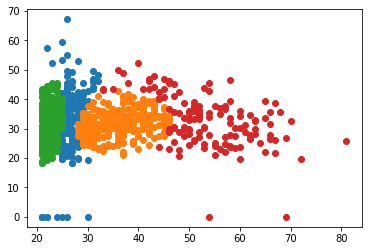

In [ ]:
for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
  
    plt.scatter(data["Age"],data["BMI"])

    

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
spectral_cluster_model= SpectralClustering(
    n_clusters=5, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)

In [ ]:
X['cluster'] = spectral_cluster_model.fit_predict(X[['Age', 'BMI']])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


[Text(0.5, 1.0, 'Age VS BMI')]

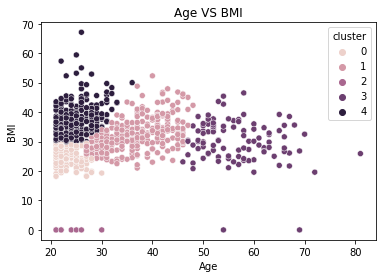

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='BMI', data=X, hue='cluster', ax=ax)
ax.set(title='Age VS BMI')